## Problem 1

In [3]:
import torch
import numpy as np

### (a) Tensor

Construct an uninitialized 4x4 matrix:





In [4]:
# todo
x = torch.empty(4,4)
print(x)

tensor([[1.0469e-38, 9.3674e-39, 9.9184e-39, 8.7245e-39],
        [9.2755e-39, 8.9082e-39, 9.9184e-39, 8.4490e-39],
        [9.6429e-39, 1.0653e-38, 1.0469e-38, 4.2246e-39],
        [1.0378e-38, 9.6429e-39, 9.2755e-39, 9.7346e-39]])


Construct a randomly initialized 3x3 matrix from a uniform distribution on the interval [0, 10)

In [5]:
# todo
x = torch.rand(3,3) * 10
print(x)

tensor([[6.4856, 9.9444, 8.8811],
        [9.1075, 9.4139, 9.8987],
        [3.9715, 7.4364, 3.2596]])


Construct a 2x2 matrix filled zeros with data type float32:

In [6]:
# todo
from torch import float32


x = torch.zeros(2,2, dtype=float32)
print(x)

tensor([[0., 0.],
        [0., 0.]])


Construct a 2x2 matrix from the normal distribution with zero mean and one std with the same shape as x. 

y's data type should be float32. 

Print the size of x and y.

In [7]:
# todo
mean = torch.zeros_like(x)
y = torch.normal(mean, x)
print(y)
# todo: print the size of x and y
print(x.shape)
print(y.shape)

tensor([[0., 0.],
        [0., 0.]])
torch.Size([2, 2])
torch.Size([2, 2])


### (b) Operations

Addition: Print x + y

In [8]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)
print(x)
print(y)
# todo
print(x+y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[4., 5.],
        [6., 7.]])
tensor([[ 5.,  7.],
        [ 9., 11.]])


Addition: add y and x inplace (modify y)

In [9]:
x = torch.tensor([[1., 2.], [3., 4.]])
y = torch.arange(4, 8, dtype=torch.float32).reshape(2, 2)

# todo: adds x to y
y.add_(x)

print(y)

tensor([[ 5.,  7.],
        [ 9., 11.]])


Indexing

In this part, you will use indexing techniques to access part of data store in tensor **x**.
x is a 3x3x3 matrix.

For simplicity, we let (a, b, c) represents the a-th in the first axis, b-th in the second axis and c-th in the third axis, a, b and c start from 0, 

e.g get x at (0, 1, 1) is to get the first in the first axis, second in the second axis and second in the third axis of x, which returns 5. 

We also let getting x at (0:2, 1, 1) mean get the first two rows in the first axis, second in the second axis and second in the third axis.

Hint: You should use standard NumPy-like indexing.


In [10]:
x = torch.arange(1, 28, dtype=torch.int32).reshape(3, 3, 3)
print(x)
# Example: get (0, 1, 1) of x
print(x[0, 1, 1])
# Example: get (0:2, 1, 1) of x
print(x[0:2, 1, 1])

tensor([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9]],

        [[10, 11, 12],
         [13, 14, 15],
         [16, 17, 18]],

        [[19, 20, 21],
         [22, 23, 24],
         [25, 26, 27]]], dtype=torch.int32)
tensor(5, dtype=torch.int32)
tensor([ 5, 14], dtype=torch.int32)


In [16]:
# todo: get (1, 2, 1) of x
print(x[1, 2, 1])

# todo: get (0, 1:3, 1) of x
print(x[0, 1:3, 1])

# todo: get (1:3, 0:3, 1:3) of x
print(x[1:3, 0:3, 1:3])


tensor(17, dtype=torch.int32)
tensor([5, 8], dtype=torch.int32)
tensor([[[11, 12],
         [14, 15],
         [17, 18]],

        [[20, 21],
         [23, 24],
         [26, 27]]], dtype=torch.int32)


Resizing

In [18]:
A = torch.arange(12)

# todo: resize A to 3x4 using view
print(A.view(3, 4))

# todo: resize A to 4x3 using reshape
print(A.view(4, 3))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8],
        [ 9, 10, 11]])


Question: what is the difference between view and reshape of a tensor?

A view shares the same underlying data in memory as the original matrix, and can only operate on tensors store in contiguous memory

A reshape can operate on tensors stored in contiguous or non-contiguous memory, and may return a copy of the tensor stored in physically separate memory.

## Problem 2

### (a) Prepare MNIST dataset

Download MNIST dataset `mnist.mat` from the [google drive link](https://drive.google.com/file/d/13BJmpfohMGthH9gGRYgxMyBk3Y2J8vE8/view?usp=sharing) and put into your Google Drive.
Mount your Google Drive to this notebook.

In [19]:
# Show matplotlib graphs in your notebook
%matplotlib inline

In [ ]:
# Mount your Google Drive to this notebook.
from google.colab import drive
drive.mount('/content/gdrive')

Load MNIST dataset from your Google Drive. 

Different from HW1, we downsample the data from 28x28 to 14x14.
The training data (images) are contained in a matrix called `mnist['traindata']` with labels called `mnist['trainlabels']`. The testing data are in `mnist['testdata']`.

In [ ]:
from scipy.io import loadmat
import torch
import torchvision.transforms as T


mnist = loadmat('/content/gdrive/My Drive/Data/mnist.mat') # change the file path according to the path where you put mnist.mat on your Google Drive.

# convert data to torch, normalize and reshape
data = torch.reshape(torch.from_numpy(mnist['traindata']).to(torch.float)/255.0 - 0.5, (mnist['traindata'].shape[0], 1, 28, 28))
testdata = torch.reshape(torch.from_numpy(mnist['testdata']).to(torch.float)/255.0 - 0.5, (mnist['testdata'].shape[0], 1, 28, 28))

trainlabels = torch.from_numpy(mnist['trainlabels'].ravel()[:50000])
validlabels = torch.from_numpy(mnist['trainlabels'].ravel()[50000:])

resize = T.Resize((14,14))
data = resize(data)
testdata = resize(testdata)
traindata = data[:50000]
validdata = data[50000:]


print(traindata.shape)
print(trainlabels.shape)
print(validdata.shape)
print(validlabels.shape)
print(testdata.shape)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

mnist_train = TensorDataset(traindata, trainlabels)
mnist_valid = TensorDataset(validdata, validlabels)
mnist_valid_loader = DataLoader(mnist_valid, batch_size=128)



Visualize an image with label.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, axs = plt.subplots(5, 5, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
  ax.imshow((mnist_train[i][0] + 0.5 ).reshape((14, 14)), cmap=cm.gray_r)
  ax.axis('off')
  ax.set_title('Number {}'.format(trainlabels[i]))

(b) Multilayer Perceptron (MLP)

Use MLP to achieve image classification.

Define the following MLP using PyTorch to do image classification on MNIST dataset according to the below figure:
Number of hidden layers: 3
Number of neurons in the layers: [100, 50, 20]
Activation functions: ReLU()
Dropout for all hidden layers: 30%
Output layer + softmax


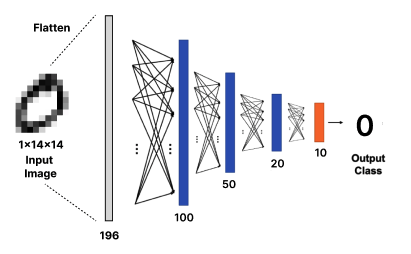

To feed the data into the MLP, each image with dim of $1 \times 14 \times 14$ needs to be flatten into a vector with dim of $196.

Just like how you transfer a Tensor onto the GPU, you transfer the neural net onto the GPU. Let's first define our device as the first visible cuda device if we have CUDA available.

**Note**: remember to keep the logs of training the different models.

In [ ]:
# use GPU to train if possible
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

In [ ]:
import torch.nn as nn

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    # TODO: define your MLP
    )

  def forward(self, x):
    # TODO: define your forward function
    return x


In [ ]:
# TODO: write your training code
def train():



# TODO: write your testing code
def test():



In [ ]:
mlp = MLP().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(mlp.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network. 

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.

In [ ]:
n_epoch = 10
# todo: use your train() to train the model


Save the trained model. 
See [here](https://pytorch.org/docs/stable/notes/serialization.html)
for more details on saving PyTorch models.

In [ ]:
PATH = '/content/gdrive/My Drive/mlp_mnist.pth'
torch.save(mlp.state_dict(), PATH)

Load back in our saved model. (Note: saving and re-loading the model
wasn't necessary here, we only did it to illustrate how to do so)



In [ ]:
mlp = MLP().to(device)
mlp.load_state_dict(torch.load(PATH))

Evaluate the classfication performance on the testing set.

In [ ]:
print(mlp)
# todo: use your test() to test your MLP on val set


(c) Convolution Neural Network (CNN)

Built a LeNet-5 using PyTorch to do image classification. Develop the CNN from the PyTorch NN tutorial introduced in class. 

Note: 
1. The input image dimension shown in the figure below is different from the one we have in this problem.
2. Use kernel size=3 for both convolutions (Original LeNet-5 uses kernel size=5 as shown in the Fig.3 of HW2.pdf)


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN

  def forward(self, x):
    # TODO: define your forward function
    return x

cnn_mnist = CNN().to(device)  # operate on GPU

In [ ]:
# todo: similar to MLP, train your CNN model

In [ ]:
print(cnn_mnist)
# todo: use your test() to test your CNN on val set

## Problem 3: Image Classification by CNN

Write code to load and visualize the CIFAR-10 dataset.

CIFAR-10 dataset has the classes (listed below): ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of size $3 \times 32 \times 32$, i.e. 3-channel color images of $32 \times 32$ pixels in size. 

<h4>Note:</h4>
The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1].

In [ ]:
from torchvision import transforms, datasets

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 
           'ship', 'truck')
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_trainset = datasets.CIFAR10(root='./data/', train=True, download=True, transform=transform)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform)

cifar_loader = DataLoader(cifar10_trainset, batch_size=len(cifar10_trainset), shuffle=False)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=len(cifar10_testset), shuffle=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

def cifar_imshow(img):
  img = img / 2 + 0.5     # unnormalize
  npimg = img.numpy()
  return np.transpose(npimg, (1, 2, 0))

# TODO: visualize some samples in the CIFAR-10 dataset


#### Data Augmentation

In [ ]:
from torch.utils.data import ConcatDataset

transform1 = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# todo: Implements transforms

# Shifting: randomly shift the images up/down and left/right by within 10%.
transform2 = 

# Rotating: randomly rotate the images by some angles.
transform3 = 

# Flipping: horizontally flip the images.
transform4 = 

# Adding Noise: randomly add some small Gaussian noise to the images.
transform5 = 

transform_list = [transform1, transform2, transform3, transform4, transform5]
augmented_dataset = []
for t in transform_list:
  augmented_dataset.append(datasets.CIFAR10(root='./data/', train=True, download=True, transform=t))

cifar_train_dataset = ConcatDataset(augmented_dataset)
cifar10_testset = datasets.CIFAR10(root='./data/', train=False, download=True, transform=transform1)
cifar_test_loader = DataLoader(cifar10_testset, batch_size=128, shuffle=False)

Define a CNN to do classification on CIFAR-10 dataset. You can build a CNN from the previous problem and modify it to take 3-channel images (instead of 1-channel images as it was defined).

**Note**: remember to keep the logs of training the different models.

(1) Define a CNN using PyTorch to do image classification. Develop the CNN from the previous PyTorch NN tutorial.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CNN1(nn.Module):
  def __init__(self):
    super().__init__()
    # TODO: define your CNN


  def forward(self, x):
    # TODO: define your forward function
    return x

cnn1 = CNN1().to(device)  # operate on GPU

Define a loss function and optimizer.

In [ ]:
import torch.optim as optim

# TODO: you can change loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn1.parameters(), lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0)

Train the network.

In [ ]:
# todo: use your train() to train your cnn1

Evaluate the classfication performance on the testing set.

In [ ]:
# todo: use your test() to test your cnn1

(2) Try different network parameters/configurations (at least 5 combinations). 

You should try to achieve at least **80%** accuracy on the CIFAR-10 testing set using one of your network configuration.


Performances using different configurations

todo: past your performance v.s different network configurations in a table.

####  Discussion

(1) Which framework can achieve higher accuracy, MLP or CNN? Briefly explain the reason.

(2) Based on your experiments in Problem3, which parameter can potentially affect your performance most?

